In [100]:
import pandas as pd
from scipy.io import loadmat
from matplotlib import pyplot as plt
import numpy as np
import math
from scipy.stats import norm
from functools import reduce

In [90]:
m = loadmat('data/anomaly_detection.mat')
data = m['X']
data_cv = m['Xval']
y_cv = m['yval']
del m
data[:10]

array([[13.04681517, 14.74115241],
       [13.40852019, 13.7632696 ],
       [14.19591481, 15.85318113],
       [14.91470077, 16.17425987],
       [13.57669961, 14.04284944],
       [13.92240251, 13.40646894],
       [12.82213164, 14.22318782],
       [15.67636615, 15.89169137],
       [16.16287532, 16.20299807],
       [12.66645095, 14.89908374]])

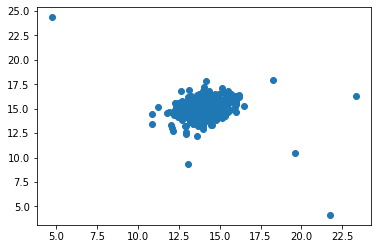

In [11]:
plt.scatter(x=data[:,0], y=data[:,1])

In [45]:
sigma2 = np.std(data, axis=0)
sigma2

array([1.35374717, 1.3075723 ])

In [35]:
mu = np.average(data, axis=0)
mu

array([14.11222578, 14.99771051])

In [91]:
dist = [
    norm(m, s)
    for (m, s) in zip(mu, sigma2)
]

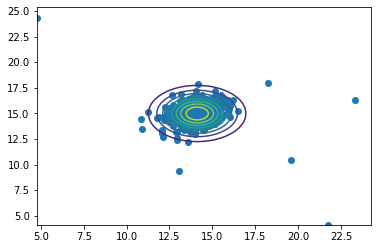

In [92]:
def draw_contours(step):
    x_min = np.min(data[:, 0])
    x_max = np.max(data[:, 0])
    y_min = np.min(data[:, 1])
    y_max = np.max(data[:, 1])
    
    dist_x = dist[0]
    dist_y = dist[1]
    
    X = []
    Y = []
    Z = []
    
    for x in np.arange(x_min, x_max, step):
        X.append(x)
    
    for y in np.arange(y_min, y_max, step):
        z_row = []
        y_pdf = dist_y.pdf(y)
        Y.append(y)
        for x in np.arange(x_min, x_max, step):
            z_row.append(dist_x.pdf(x) * y_pdf)
        Z.append(z_row)
            
    plt.contour(X, Y, Z, levels=10)
            
    
plt.scatter(x=data[:,0], y=data[:,1])
draw_contours(0.2)

0.01


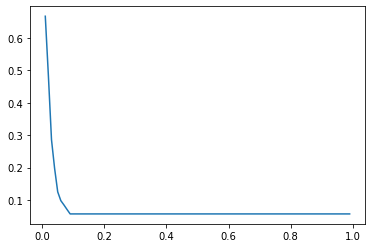

In [105]:
def compute_f1(threshold):
    tp = 0
    fp = 0
    fn = 0
    
    for row, y in zip(data_cv, y_cv):
        p = 1
        for i in range(0, len(dist)):
            p = p * dist[i].pdf(row[i])
        if p < threshold:
            if y == 1:
                tp = tp + 1
            else:
                fp = fp + 1
        elif y == 1:
            fn = fn + 1
        
    prec = tp / (tp + fp)
    rec = tp / (tp + fn)
    return (2 * prec * rec) / (prec + rec)


def plot_f1(step):
    x_axis = []
    y_axis = []
    
    max_threshold = None
    max_threshold_value = None
    
    for threshold in np.arange(step, 1, step):
        x_axis.append(threshold)
        f1 = compute_f1(threshold)
        if max_threshold is None or f1 > max_threshold_value:
            max_threshold = threshold
            max_threshold_value = f1
        y_axis.append(f1)
        
    plt.plot(x_axis, y_axis)
    return max_threshold
         
threshold = plot_f1(0.01)
print(threshold)
    

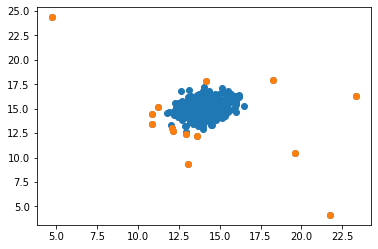

In [106]:
yh = [
    reduce(
        lambda a, b: a * b,
        [
            value_dist.pdf(value)
            for value, value_dist in zip(row, dist)
        ],
    ) < threshold
        
    for row in data
]

yh

plt.scatter(x=data[:,0], y=data[:,1])
plt.scatter(x=data[yh,0], y=data[yh,1])